# Sales Data Analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df= pd.read_csv("Sales Data.csv")
df.head(6)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0,NaN,NaN


In [184]:
df.shape

(11251, 15)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [186]:
# Deleting columns Status and unnamed1
df.drop(['Status','unnamed1'], axis=1, inplace= True)

In [187]:
df= df.replace({'M':'Male','F':'Female'})
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,Male,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,Male,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,Female,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,Male,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [188]:
# To check Null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [189]:
# To drop null values
df.dropna(inplace= True)

In [190]:
# To check for null values
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [191]:
# To check data types
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [192]:
# Changing Data type for 'Amount' from float to int
df['Amount'] = df['Amount'].astype('int')

In [193]:
# To check if the data type has been changed
df['Amount'].dtypes

dtype('int32')

In [194]:
# List of All columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [195]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [196]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Gender

In [197]:
df['Gender'].value_counts()

Gender
Female    7832
Male      3407
Name: count, dtype: int64

Text(0, 0.5, 'Count of Orders Placed')

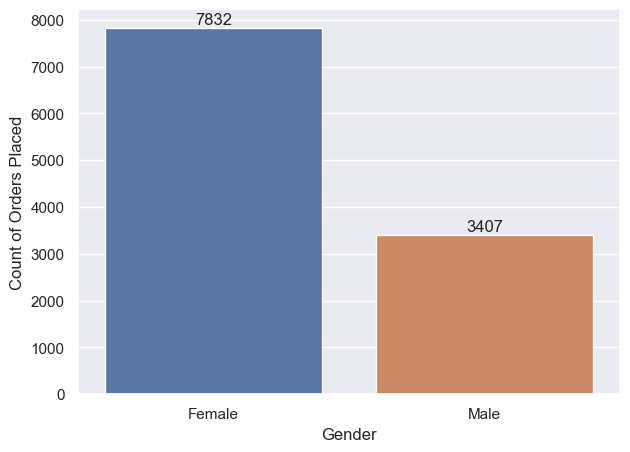

In [198]:
#Total number of orders by gender

ax = sns.countplot(df, x='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    
sns.set(rc={'figure.figsize':(7,5)})

ax.set_ylabel('Count of Orders Placed')

In [199]:
sales_gen = df.groupby(['Gender'],as_index= False)['Amount'].sum().sort_values('Amount',ascending = False)
sales_gen

,Gender,Amount
0,Female,74335853
1,Male,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

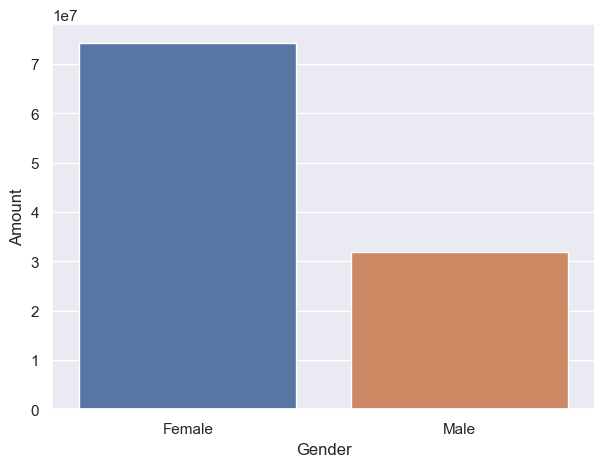

In [200]:
sns.barplot(sales_gen, x= 'Gender', y= 'Amount')

## Age

Text(0, 0.5, 'Count of Orders placed')

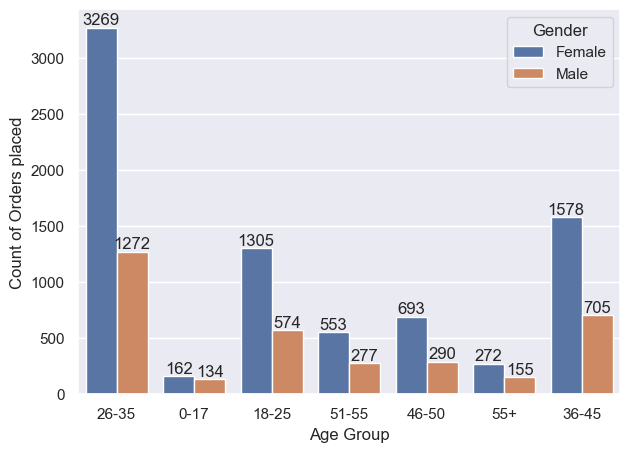

In [204]:
#Total number of orders by age

ax = sns.countplot(df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
        ax.bar_label(bars)

ax.set_ylabel('Count of Orders placed')

In [205]:
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
sales_age 

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

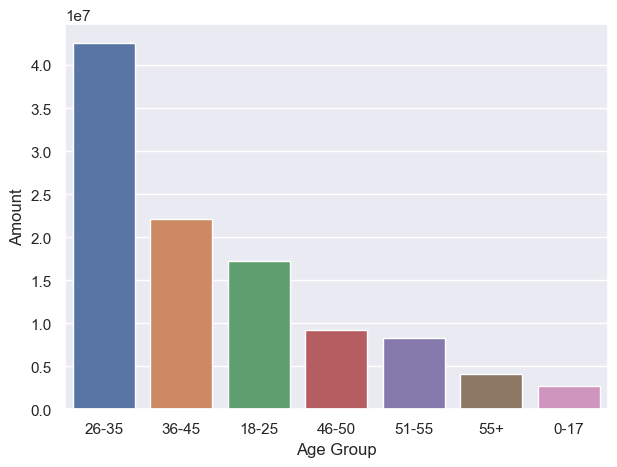

In [206]:
sns.barplot(sales_age ,x= 'Age Group',y= 'Amount')

## State

In [207]:
#Total number of orders from top 10 states

sales_state = df.groupby('State',as_index= False)['Orders'].sum().sort_values(by= 'Orders', ascending= False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

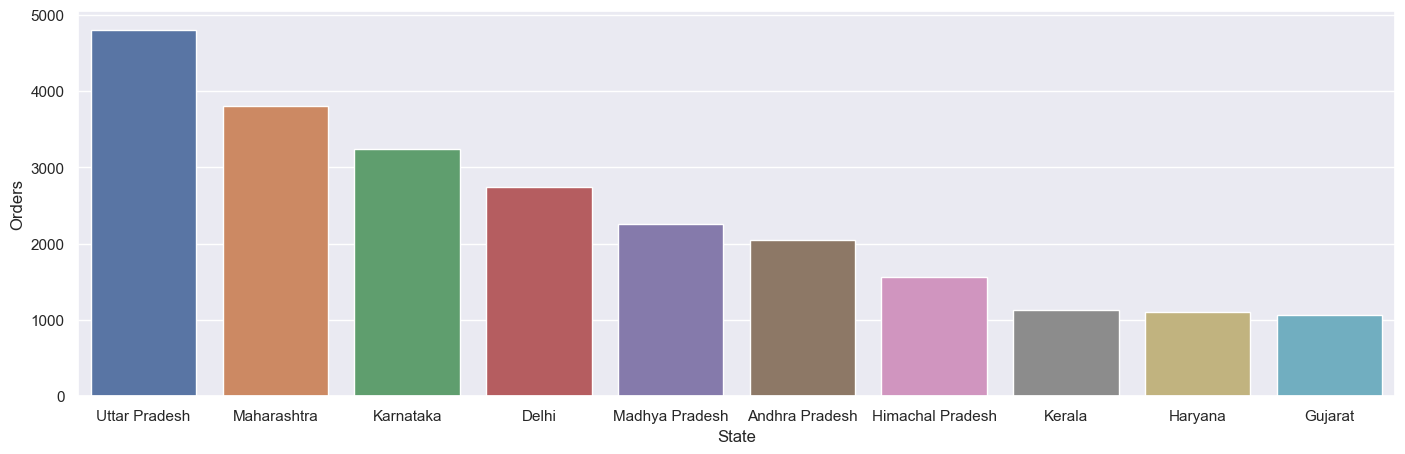

In [208]:
#Total number of orders from top 10 states

sns.set(rc= {'figure.figsize': (17,5)})                                                                                                             
sns.barplot(sales_state, x= 'State', y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

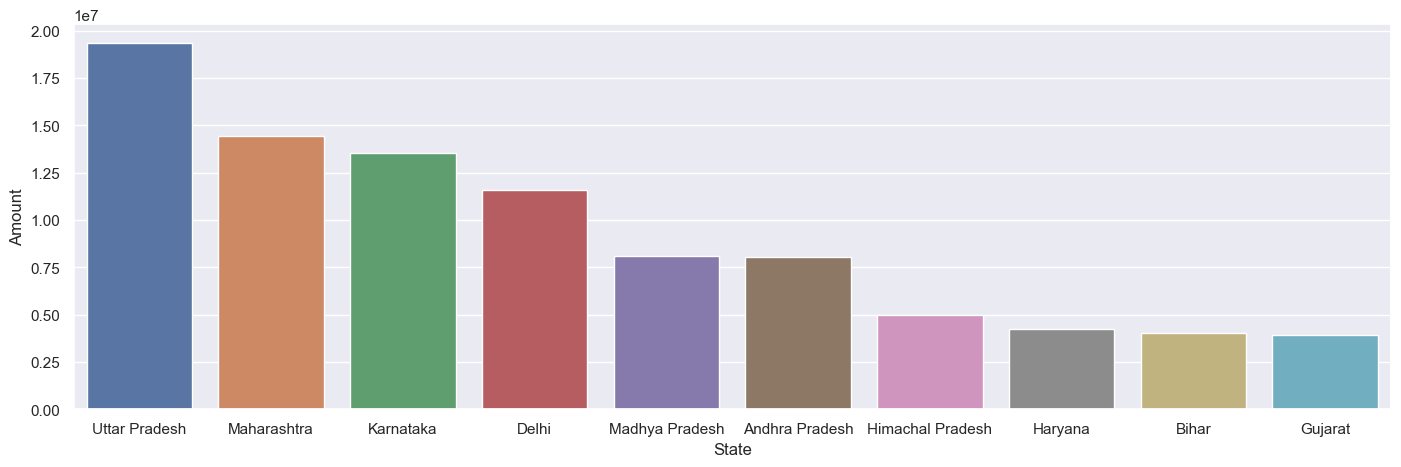

In [209]:
#Total Amount/Sales from top 10 states

sales_state = df.groupby('State',as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False).head(10)
                                                                                                        
sns.barplot(sales_state, x= 'State', y= 'Amount')

## Martial Status

[Text(0, 0, 'Married'), Text(1, 0, 'unmarried')]

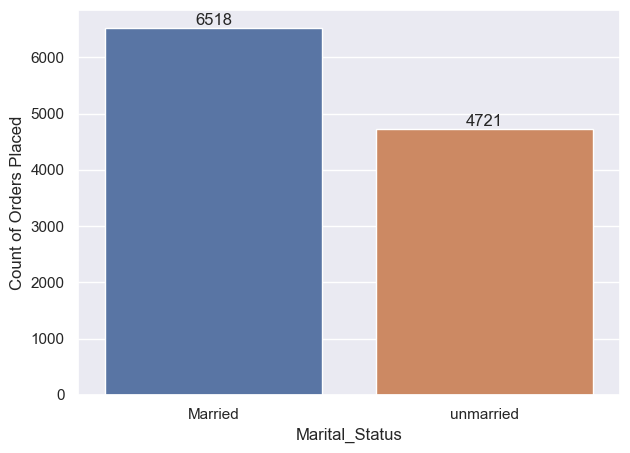

In [211]:
ax = sns.countplot(df, x= 'Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)
    
sns.set(rc= {'figure.figsize': (7,5)})

ax.set_ylabel('Count of Orders Placed')
ax.set_xticklabels(['Married','unmarried'])

In [212]:
sales_MS= df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sales_MS

,Marital_Status,Gender,Amount
0,0,Female,43786646
2,1,Female,30549207
1,0,Male,18338738
3,1,Male,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

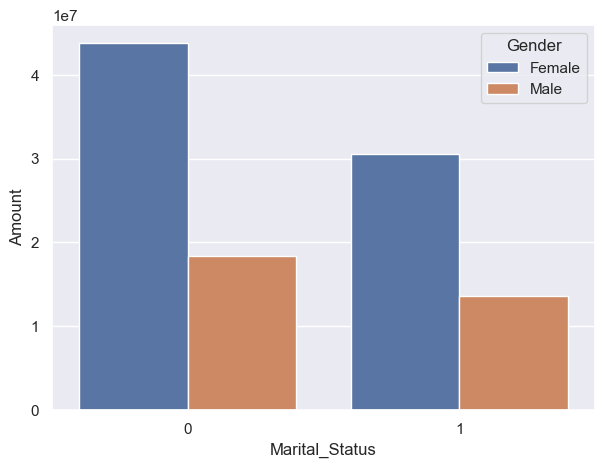

In [216]:
sns.barplot(sales_MS, x= 'Marital_Status', y = 'Amount', hue = 'Gender')

## Occupation

Text(0, 0.5, 'Count of Orders Placed')

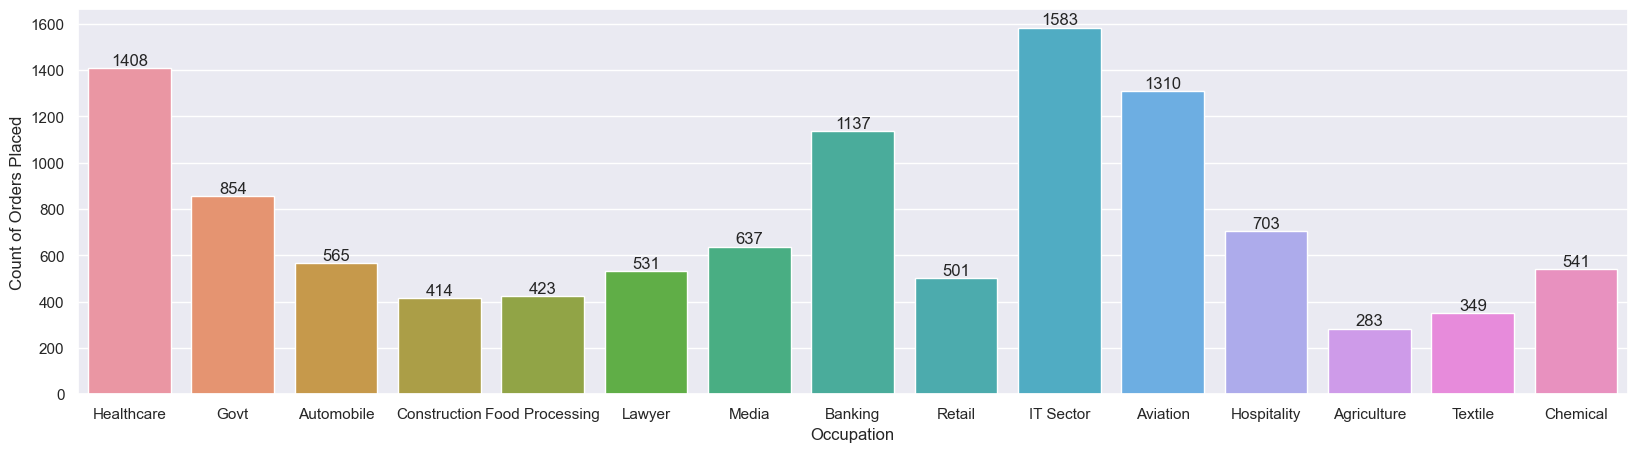

In [221]:
sns.set(rc= {'figure.figsize': (20,5)})
ax= sns.countplot(df, x= 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
    
ax.set_ylabel('Count of Orders Placed')


In [228]:
sales_occ=df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by= 'Amount',ascending = False)
sales_occ

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

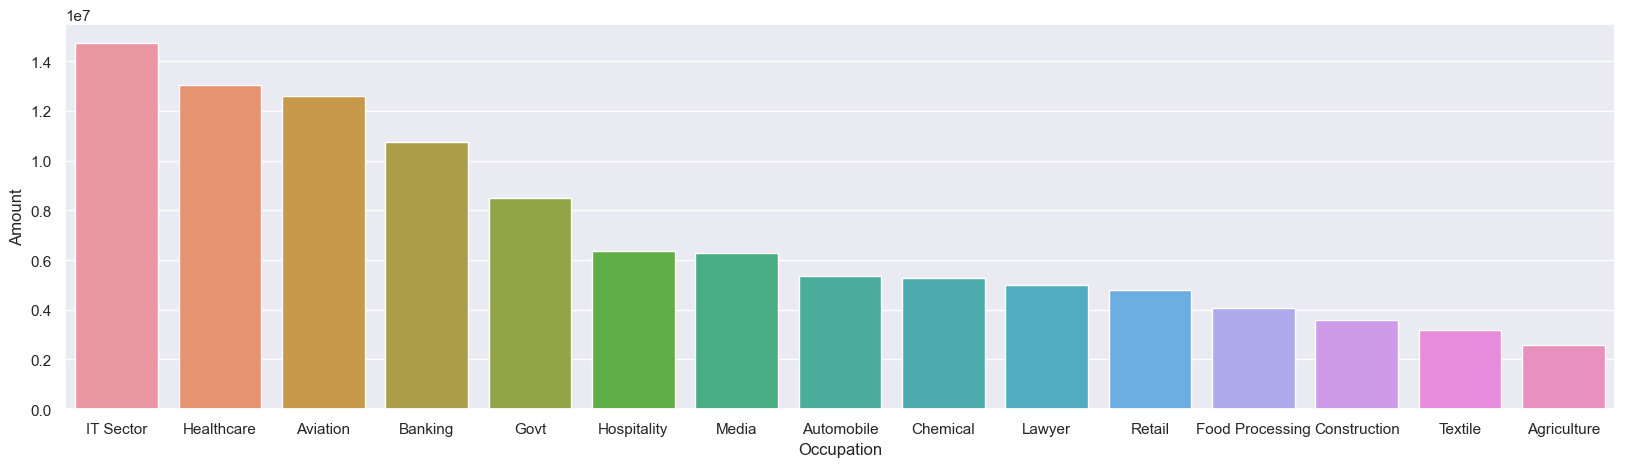

In [266]:
sns.barplot(sales_occ, x= 'Occupation', y= 'Amount')

## Product Category

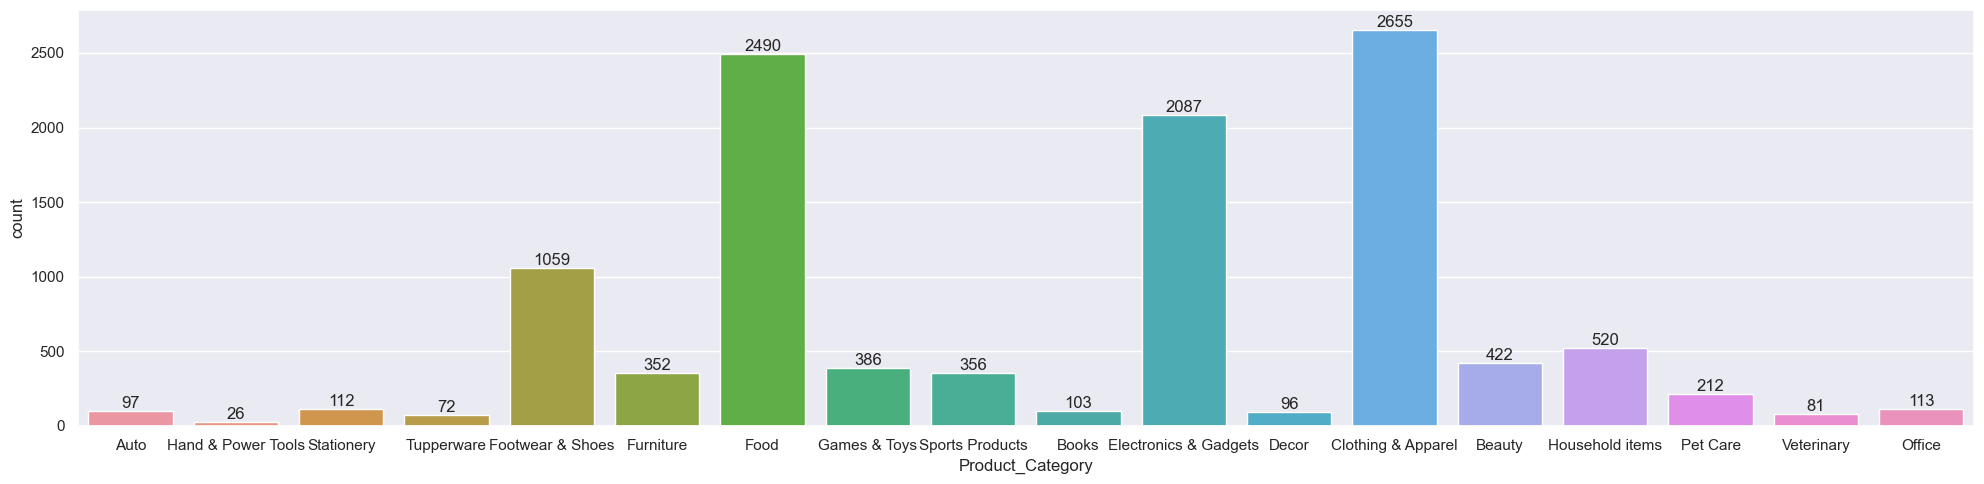

In [267]:
ax= sns.countplot(df, x= 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars) 
    
ax= sns.set(rc= {'figure.figsize':(20,5)})


In [246]:
sales_pc = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
sales_pc

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

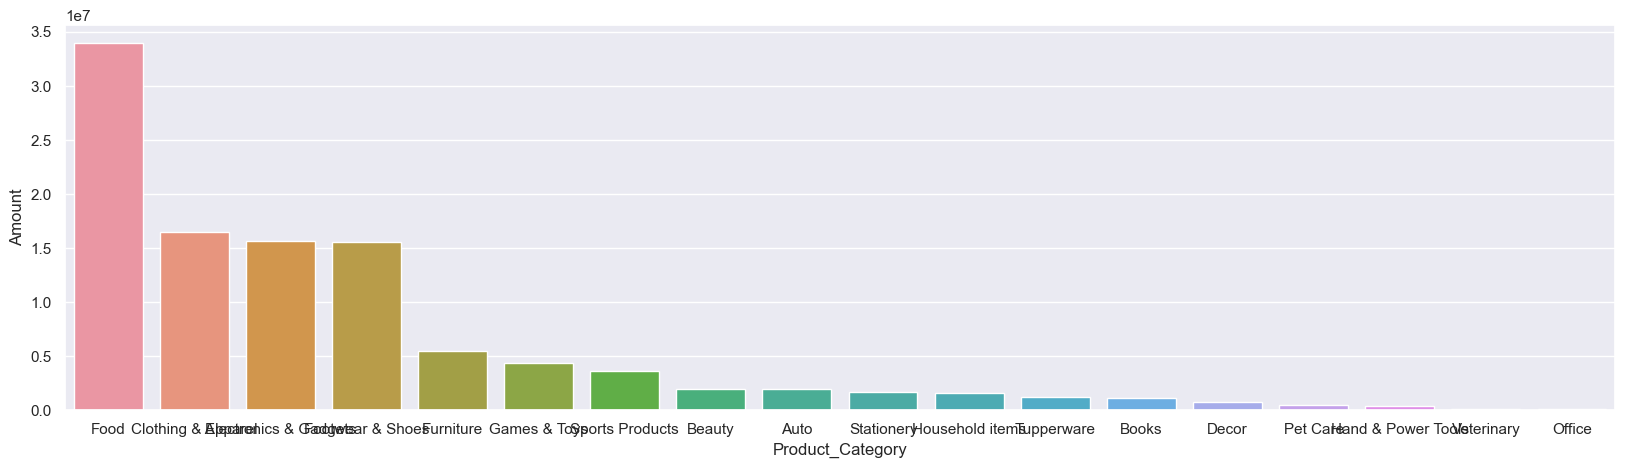

In [268]:
sns.set(rc= {'figure.figsize': (20,5)})

sns.barplot(sales_pc, x= 'Product_Category', y = 'Amount')

In [ ]:
# Product_ID vs Orders

In [294]:
sales = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sales

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


<Axes: xlabel='Product_ID', ylabel='Orders'>

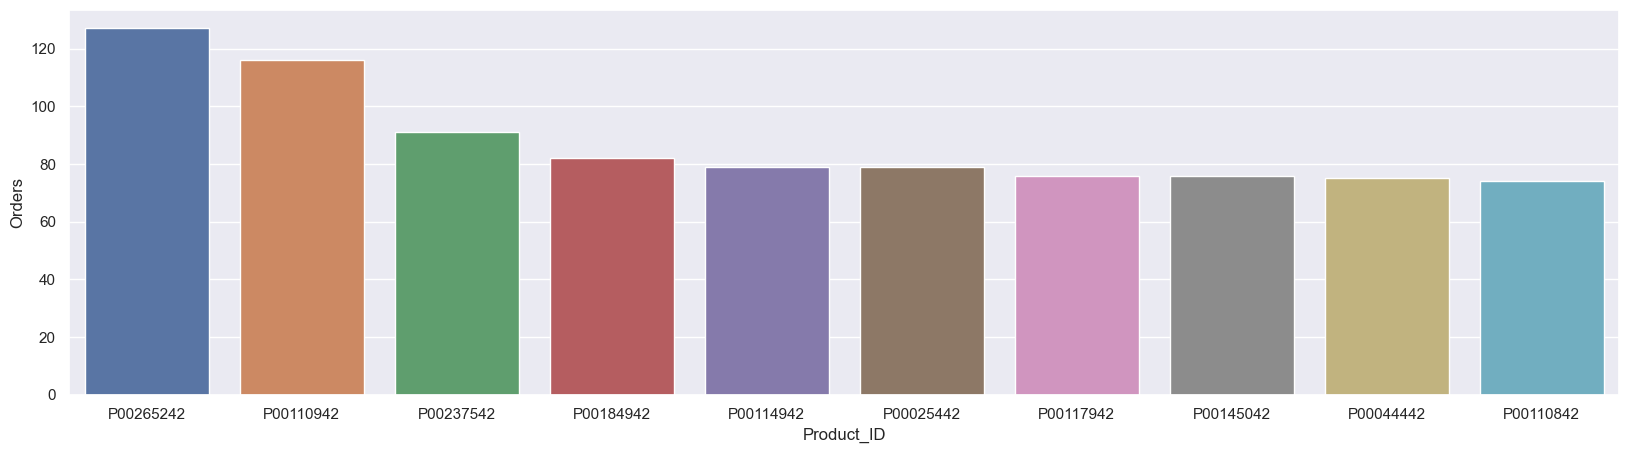

In [295]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales, x = 'Product_ID',y= 'Orders')

# Conclusion

Married women of age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.